In [1]:

import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/coffee-shop-sales/Coffee Shop Sales.xlsx


In [2]:
path = '/kaggle/input/coffee-shop-sales/Coffee Shop Sales.xlsx'
df = pd.read_excel(path)
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [4]:
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [5]:
df['store_location'].value_counts()

store_location
Hell's Kitchen     50735
Astoria            50599
Lower Manhattan    47782
Name: count, dtype: int64

In [6]:
df['product_category'].value_counts()

product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: count, dtype: int64

In [7]:
df.drop(columns=['transaction_id'],inplace=True)

In [8]:
df['total_cost'] = df['transaction_qty'] * df['unit_price']
df.head(3)

,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_cost
0,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0
1,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2
2,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0


In [9]:
df['transaction_date'].tail()

149111   2023-06-30
149112   2023-06-30
149113   2023-06-30
149114   2023-06-30
149115   2023-06-30
Name: transaction_date, dtype: datetime64[ns]

# Let's Create New DataFrame For Monthly Total Sales

In [10]:
m1 = (df['transaction_date'] >= '2023-01-01') & (df['transaction_date'] <= '2023-01-31')
m1_total = df[m1]
a = sum(m1_total['total_cost'])

m2 = (df['transaction_date'] >= '2023-02-01') & (df['transaction_date'] <= '2023-02-28')
m2_total = df[m2]

b = sum(m2_total['total_cost'])

m3 = (df['transaction_date'] >= '2023-03-01') & (df['transaction_date'] <= '2023-03-31')
m3_total = df[m3]

c = sum(m3_total['total_cost'])

m4 = (df['transaction_date'] >= '2023-04-01') & (df['transaction_date'] <= '2023-04-30')
m4_total = df[m4]

d = sum(m4_total['total_cost'])

m5 = (df['transaction_date'] >= '2023-05-01') & (df['transaction_date'] <= '2023-05-31')
m5_total = df[m5]

e = sum(m5_total['total_cost'])

m6 = (df['transaction_date'] >= '2023-06-01') & (df['transaction_date'] <= '2023-06-30')
m6_total = df[m6]

f = sum(m6_total['total_cost'])



In [11]:
monthly_total_sales = {
    'Month': ['January',
              'February',
              'March',
              'April',
              'May',
              'June'],
    'Total Sales': [a, b, c, d, e, f]  
}


month_sales = pd.DataFrame(monthly_total_sales)

In [12]:
month_sales

,Month,Total Sales
0,January,81677.74
1,February,76145.19
2,March,98834.68
3,April,118941.08
4,May,156727.76
5,June,166485.88


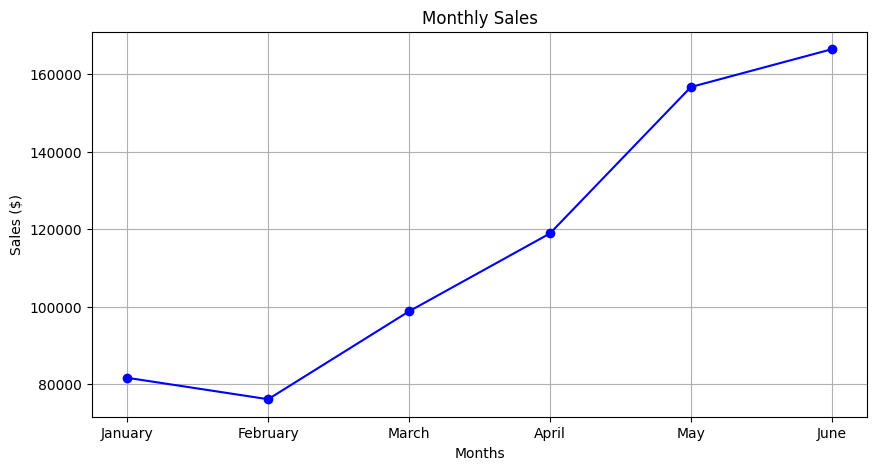

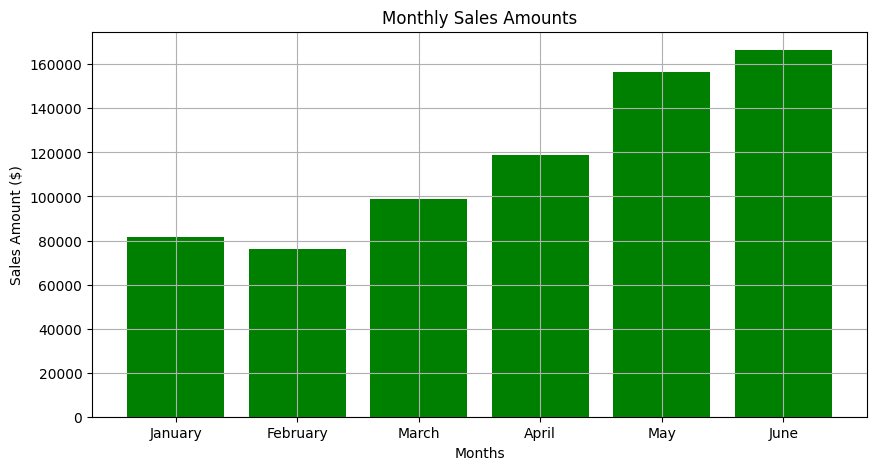

In [13]:
import matplotlib.pyplot as plt



plt.figure(figsize=(10, 5))
plt.plot(month_sales['Month'], month_sales['Total Sales'], marker='o', color='b')
plt.title('Monthly Sales')
plt.xlabel('Months')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.bar(month_sales['Month'], month_sales['Total Sales'], color='g')
plt.title('Monthly Sales Amounts')
plt.xlabel('Months')
plt.ylabel('Sales Amount ($)')
plt.grid(True)
plt.show()




